In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

import keras
from keras import layers


In [7]:
# Leitura dos datasets
abalone_train = pd.read_csv('abalone_train.csv',
                            names=["Length", "Diameter", "Height", "Whole weight",
                                   "Shucked weight", "Viscera weight", "Shell weight", "Age"])
abalone_test = pd.read_csv('abalone_test.csv',
                           names=["Length", "Diameter", "Height", "Whole weight",
                                  "Shucked weight", "Viscera weight", "Shell weight", "Age"])

# Preparação dos dados (separar a Age, visto que esta é o que se pretende estimar)
abalone_train_features = abalone_train
abalone_train_labels = abalone_train_features.pop("Age")
abalone_test_features = abalone_test
abalone_test_labels = abalone_test_features.pop("Age")

# Construir conjuntos de treino e teste
x_train = np.array(abalone_train_features)
y_train = np.array(abalone_train_labels)
x_test = np.array(abalone_test_features)
y_test = np.array(abalone_test_labels)



In [8]:
# Mostrar as dimensões
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(3320, 7)
(3320,)
(850, 7)
(850,)


In [9]:
abolonet_model = keras.Sequential([
    layers.Input(shape=(7,)),   # 7 features de entrada
    layers.Dense(64, activation='relu'),  # Primeira camada oculta
    layers.Dense(1, activation='linear')  # Saída contínua (sem 'relu' aqui!)
])



In [10]:
# mostrar um sumário do modelo (organização e n. de pesos a otimizar em cada camada)
abolonet_model.summary()

# compilar o modelo, definindo a loss function e o algoritmo de otimização
abolonet_model.compile(
    loss="mean_squared_error",  # MSE é a função de perda
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["mae"]  # MAE é a métrica correta para regressão
)

# treinar, guardando os dados do treino numa variável
h = abolonet_model.fit(x_train, y_train, batch_size=64, epochs=500, validation_data=(x_test, y_test))

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 577 (2.25 KB)

 Trainable params: 577 (2.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 90.7319 - mae: 9.0558 - val_loss: 73.6487 - val_mae: 8.0563
Epoch 2/500
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 64.3226 - mae: 7.4687 - val_loss: 41.1020 - val_mae: 5.7774
Epoch 3/500
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31.8683 - mae: 4.9950 - val_loss: 17.7962 - val_mae: 3.2693
Epoch 4/500
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.6876 - mae: 2.8768 - val_loss: 10.0519 - val_mae: 2.2749
Epoch 5/500
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.5850 - mae: 2.2602 - val_loss: 9.2579 - val_mae: 2.1998
Epoch 6/500
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.7198 - mae: 2.1605 - val_loss: 8.9587 - val_mae: 2.1563
Epoch 7/500
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.4948 - mae: 2.1547 - val_loss: 8.6549 - val_mae: 2.1040
Epoch 8/500
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.2624 - mae: 2.0756 - val_loss: 8.3900 - val_mae: 2.0562
Epoch 9/500
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - los

In [11]:
output_pred = abolonet_model.predict(x_test)

# Como é regressão, a saída já é um número contínuo (não precisa de argmax)
y_pred = output_pred.flatten()  # Converter para um array 1D

print("Idades previstas:", y_pred[:-10])  # Mostrar as 10 primeiras previsões
print("Idades reais:", y_test[:-10])


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Idades previstas: [18.474773  15.138793   8.259662  11.415874   9.975646  11.485318
  8.262957  10.465575  11.583383  11.970785  12.393849  10.217938
 12.183984  11.667482   9.5468645 14.121921  13.519841  10.126679
  8.434464  10.839335  11.29992    8.338633   7.316797   8.581656
 13.785228   9.982966   8.477183   9.583229   7.2976155 12.667744
  6.618212  11.131578  10.274653   6.819304   6.9597735 13.578223
 10.904716   8.444821   9.14322   15.778774  10.386682  14.0539255
  7.9566107  6.541587   9.686044   7.0827584 11.342786   8.641463
  9.435224   9.206901  10.066615   9.135977  11.253425  10.661247
 12.042744  11.807443  11.907456  11.542692  10.932351   9.644633
 11.242705  13.406784  15.495309  10.369503  14.262685   9.225302
 10.451135   5.4510446 15.771535  11.751217  10.599296  14.215869
 11.634929  10.676019  12.886725  11.800239  13.283011  11.683333
 11.022845  10.383388   4.4481664  9.732208  11.937462   8.577451
  9.799343   8.75

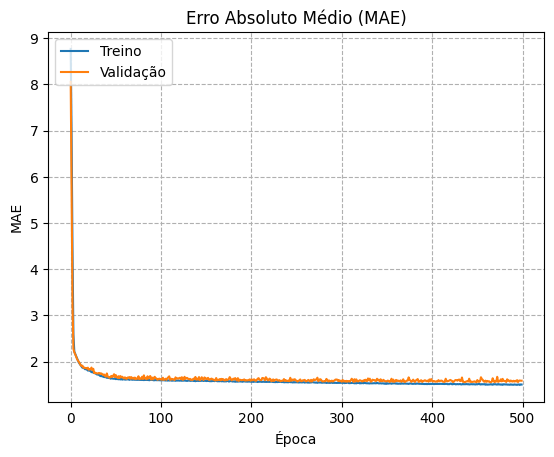

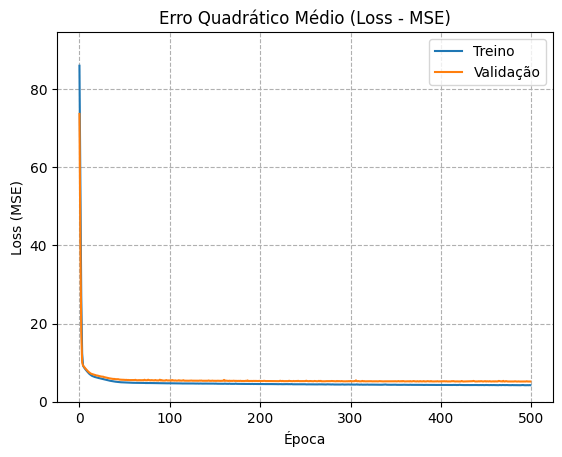

In [12]:
plt.figure(num=1)
plt.plot(h.history['mae'])  # Treino
plt.plot(h.history['val_mae'])  # Validação
plt.title('Erro Absoluto Médio (MAE)')
plt.ylabel('MAE')
plt.xlabel('Época')
plt.legend(['Treino', 'Validação'], loc="upper left")
plt.grid(True, ls='--')

# Plotar a perda (MSE) durante o treino
plt.figure(num=2)
plt.plot(h.history['loss'])  # Treino
plt.plot(h.history['val_loss'])  # Validação
plt.title('Erro Quadrático Médio (Loss - MSE)')
plt.ylim(0, max(h.history['loss']) * 1.1)  # Ajusta limite do gráfico
plt.ylabel('Loss (MSE)')
plt.xlabel('Época')
plt.legend(['Treino', 'Validação'], loc="upper right")
plt.grid(True, ls='--')

plt.show()


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


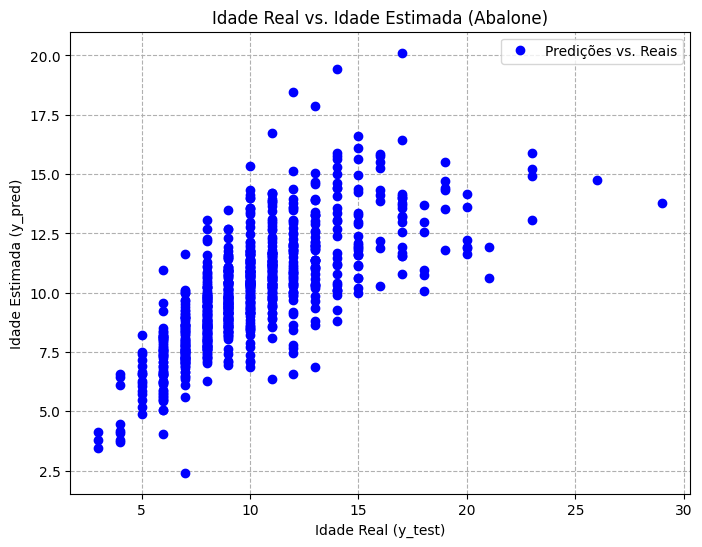

In [13]:
y_pred = abolonet_model.predict(x_test).flatten()  # Flatten para garantir que é um vetor 1D

# Gráfico de dispersão: valores reais (y_test) vs. valores previstos (y_pred)
plt.figure(figsize=(8, 6))
plt.plot(y_test, y_pred, 'bo', label="Predições vs. Reais")
plt.xlabel("Idade Real (y_test)")
plt.ylabel("Idade Estimada (y_pred)")
plt.title("Idade Real vs. Idade Estimada (Abalone)")
plt.grid(True, linestyle='--')
plt.legend()
plt.show()